In [14]:
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import string  # Provides constants (like ascii_letters, digits, punctuation) and functions for string manipulation.
import os      # Provides functions to interact with the operating system (e.g., working with files, directories).
import shutil  # Provides functions to perform high-level file operations (e.g., copying, moving, deleting files).
import re      # Provides support for regular expressions for string pattern matching and manipulation.


import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

from sklearn.linear_model import LinearRegression

In [16]:
#generate sequence. 
sequence = np.array(list(range(10))).astype(float) #generate num 1-10, convert to python list, convert to numpy array, as floating type

In [18]:
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [20]:
#number of training words
window_size = 3

In [24]:
# Generate sliding windows of size `window_size`
train_data = [np.array(sequence[i:i+window_size]).reshape(1, -1) for i in range(sequence.shape[0] - window_size)]

# Repeat the sliding windows 10 times and combine into a single array
train_data = np.concatenate(train_data * 10, axis=0)

# Reshape to 3D format for RNN input (samples, time steps, features)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [26]:
train_data.shape

(70, 3, 1)

In [28]:
#getting the labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0] - window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [32]:
train_label[0:3]

array([[3.],
       [4.],
       [5.]])

Step-by-Step:

For i = 0:
Window: sequence[0:3] → [0., 1., 2.]
Label: sequence[0 + 3] → sequence[3] → 3.0

For i = 1:
Window: sequence[1:4] → [1., 2., 3.]
Label: sequence[1 + 3] → sequence[4] → 4.0

For i = 2:
Window: sequence[2:5] → [2., 3., 4.]
Label: sequence[2 + 3] → sequence[5] → 5.0

Train Model

In [51]:
model = Sequential()
model.add(SimpleRNN(1, activation='linear'))

opt = Adam(learning_rate=.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.0244 - mse: 123.0244  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.7250 - mse: 40.7250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5213 - mse: 14.5213
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6462 - mse: 2.6462
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1144 - mse: 0.1144
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0325 - mse: 2.0325
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9837 - mse: 2.9837 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5697 - mse: 1.5697
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2194 - mse: 0.2194 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0458 - mse: 0.0458
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3127 - mse: 0.3127
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5088 - mse: 0.5088 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

Predict Using model On Known Data

In [56]:
preds = model.predict(train_data).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [67]:
for i in range(len(preds[:3])):
    example = train_data[i].flatten()  # Flatten each window
    pred = preds[i]  # Get the corresponding prediction
    print(f'{example} -> {pred}')


[0. 1. 2.] -> 3.0970277786254883
[1. 2. 3.] -> 4.07080078125
[2. 3. 4.] -> 5.044573783874512


Text(0, 0.5, 'actual')

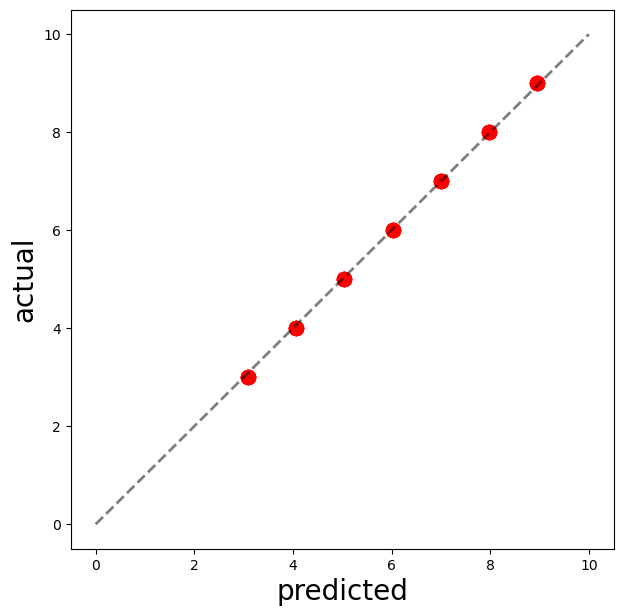

In [69]:
plt.figure(figsize=(7,7))
actuals = train_label.flatten()
plt.plot([0,10], [0,10], color='k', linestyle='--', alpha=0.5, linewidth=2)
plt.scatter(preds, actuals, s=100, color='r')
plt.xlabel('predicted', fontsize=20)
plt.ylabel('actual', fontsize=20)

The above code was a very simple implementation of RNN

lets try on unknown data

In [72]:
out_of_sample_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

In [74]:
preds = model.predict(out_of_sample_data).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [76]:
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 8.939666748046875
[7 8 9] -> 9.913440704345703
[ 8  9 10] -> 10.887212753295898
[ 9 10 11] -> 11.860986709594727
[10 11 12] -> 12.834759712219238
